## Checking possibilities of AutoML package from MLJAR

---

based on the https://github.com/mljar/mljar-supervised

### Supported evaluation metrics (eval_metric argument in AutoML())
---

    for binary classification: logloss, auc, f1, average_precision, accuracy- default is logloss
    for mutliclass classification: logloss, f1, accuracy - default is logloss
    for regression: rmse, mse, mae, r2, mape, spearman, pearson - default is rmse



Lets now use data for flats in Moskow and see the results with only automatic setup

## 1. Loading libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500) # to avoid displaying only couple of columns
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML
from tqdm import tqdm

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


## 2. Loading data and preparing set of features and target  (X, y)

In [2]:
df_train = pd.read_csv(
    "./moskwa/train_property.csv"
)

In [3]:
df_train.sample(3)

,Unnamed: 0,breadcrumbs,date,geo_block,owner,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,Repair:,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:
14808,14808,"['Москва', 'Тимирязевский', 'м. Дмитровская', ...","['вчера в 05:37', '2', '(+2 за сегодня)']","['г. Москва', 'Тимирязевский', 'г. Москва', 'Т...",[],15.508273,provided,Monolithic,flat,new building,no fee,Pit,Business class,yes,NaN,NaN,yes,street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33211,33211,"['Москва', 'Рязанский', 'м. Рязанский проспект...","['1 февраля', '28', '(+1 за сегодня)', 'Обновл...","['г. Москва', 'Рязанский', 'г. Москва', 'Рязан...",[],12.900000,provided,Monolithic,flat,new building,no fee,Pit,Business class,yes,NaN,NaN,yes,NaN,yes,euro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25985,25985,"['Москва', 'Раменки', 'м. Раменки', 'МЦК Кутуз...","['16 января', '20', '(+1 за сегодня)', 'Обновл...","['г. Москва', 'Раменки', 'ул Лобачевского', 'г...",[],12.610928,closed area,Monolithic,flat,new building,no fee,Playground,Business class,yes,NaN,NaN,yes,yard,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_test = pd.read_csv(
    "./moskwa/test_property.csv"
)

In [5]:
df_test.sample(3)

,Unnamed: 0,breadcrumbs,date,geo_block,owner,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,Repair:,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:,id
6805,6805,"['Москва', 'Люблино', 'м. Люблино', 'МЦК Угреш...","['17 мая', '2', '(+1 за сегодня)']","['г. Москва', 'Люблино', 'ул Верхние Поля', 'г...",[],NaN,Monolithic,apartments,secondary,no fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6805
1794,1794,"['Москва', 'МЦК Лужники']","['29 марта', '13', '(+1 за сегодня)', 'Обновле...","['г. Москва', 'г. Москва']",[],"closed area, Concierge",Monolithic-brick,apartments,new building,no fee,Building walls,Elite class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1794
1092,1092,"['Москва', 'Выхино-Жулебино', 'м. Лермонтовски...","['15 мая', '5', '(+1 за сегодня)']","['г. Москва', 'Выхино-Жулебино', 'г. Москва', ...",[],NaN,Monolithic,apartments,secondary,no fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1092


In [6]:
df_test.shape, df_train.shape

((22667, 36), (45694, 36))

In [7]:
columns_=list(df_train.columns)
columns_

['Unnamed: 0',
 'breadcrumbs',
 'date',
 'geo_block',
 'owner',
 'price',
 'Security:',
 'Building type:',
 'Object type:',
 'Ad type:',
 'Commission agent:',
 'Construction phase:',
 'Housing class:',
 'Elevator:',
 'Bathroom type:',
 'Balcony type:',
 'Mortgage possible:',
 'The view from the window:',
 'Garbage chute:',
 'Repair:',
 'Fridge:',
 'Phone:',
 'Furniture:',
 'Free layout:',
 'It is possible to bargain:',
 'Floor covering:',
 'Room type:',
 'Internet:',
 'Kitchen furniture:',
 'TV:',
 'Washing machine:',
 'Foundation type:',
 'Overlap type:',
 'Type of the building:',
 'Playground:',
 'Class:']

as mostly there are some text columns lets factorize them to get something for X

In [8]:
df = pd.read_csv(
    "./moskwa/train_property.csv"
)

In [9]:
cat_feats = [x for x in df.columns if ":" in x]
for feat in tqdm(cat_feats):
    df["{}_cat".format(feat)] = df[feat].factorize()[0]

100%|██████████| 31/31 [00:00<00:00, 52.54it/s]


In [10]:
df.shape

(45694, 67)

In [11]:
df.describe()

,Unnamed: 0,price,Unnamed: 0_cat,Security:_cat,Building type:_cat,Object type:_cat,Ad type:_cat,Commission agent:_cat,Construction phase:_cat,Housing class:_cat,Elevator:_cat,Bathroom type:_cat,Balcony type:_cat,Mortgage possible:_cat,The view from the window:_cat,Garbage chute:_cat,Repair:_cat,Fridge:_cat,Phone:_cat,Furniture:_cat,Free layout:_cat,It is possible to bargain:_cat,Floor covering:_cat,Room type:_cat,Internet:_cat,Kitchen furniture:_cat,TV:_cat,Washing machine:_cat,Foundation type:_cat,Overlap type:_cat,Type of the building:_cat,Playground:_cat,Class:_cat
count,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000,45694.000000
mean,22846.500000,17.422577,22846.500000,2.638727,1.992778,0.493785,0.769204,-0.007069,1.090953,0.846873,-0.413030,-0.550794,-0.626253,-0.581980,-0.513656,-0.577297,-0.846457,-0.992909,-0.985118,-0.992866,-0.980938,-0.993260,-0.982689,-0.981748,-0.981639,-0.995273,-0.996608,-0.998008,-0.986935,-0.991946,-0.992100,-0.995711,-0.998249
std,13190.865937,38.332439,13190.865937,7.170444,0.686521,0.565491,0.693000,0.083779,1.612602,1.139299,0.492384,0.839044,0.736021,0.493239,0.759319,0.493994,0.455172,0.083908,0.121080,0.084165,0.136743,0.081824,0.175871,0.161432,0.134255,0.068592,0.058144,0.044582,0.200081,0.094845,0.090247,0.065354,0.041806
min,0.000000,0.820018,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,11423.250000,7.173917,11423.250000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,22846.500000,9.910000,22846.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,34269.750000,15.405717,34269.750000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,45693.000000,3000.000015,45693.000000,108.000000,8.000000,3.000000,2.000000,0.000000,6.000000,3.000000,0.000000,2.000000,4.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,0.000000,0.000000


In [12]:
num_feats = [x for x in df.columns if "_cat" in x]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    df[num_feats], df["price"], test_size=0.25
)

In [14]:
X_train.shape

(34270, 31)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34270, 31), (11424, 31), (34270,), (11424,))

Lets see what automl presents us without even using log of price

## 3. Generating first results with default setup of AutoML

In [39]:
# automl = AutoML()
automl = AutoML(mode="Explain")
automl.fit(X_train, y_train)

predictions = automl.predict(X_test)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 36.241518 trained in 1.26 seconds
2_DecisionTree rmse 31.822292 trained in 28.07 seconds
* Step default_algorithms will try to check up to 3 models


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


3_Default_Xgboost rmse 26.313265 trained in 16.53 seconds
4_Default_NeuralNetwork rmse 28.971193 trained in 6.72 seconds
5_Default_RandomForest rmse 29.087302 trained in 27.68 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 26.313265 trained in 0.63 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 126.71 seconds
AutoML best model: 3_Default_Xgboost


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


---

### Package took default metric  rmse , and generated excelent package with results with starting README/leaderboard under address as below
http://localhost:8888/lab/tree/MLJAR/AutoML_1/README.md



# AutoML Leaderboard

| Best model   | name                                                         | model_type     | metric_type   |   metric_value |   train_time |
|:-------------|:-------------------------------------------------------------|:---------------|:--------------|---------------:|-------------:|
|              | [1_Baseline](1_Baseline/README.md)                           | Baseline       | rmse          |        36.2415 |         2.01 |
|              | [2_DecisionTree](2_DecisionTree/README.md)                   | Decision Tree  | rmse          |        31.8223 |        29.27 |
| **the best** | [3_Default_Xgboost](3_Default_Xgboost/README.md)             | Xgboost        | rmse          |        26.3133 |        17.71 |
|              | [4_Default_NeuralNetwork](4_Default_NeuralNetwork/README.md) | Neural Network | rmse          |        28.9712 |         7.47 |
|              | [5_Default_RandomForest](5_Default_RandomForest/README.md)   | Random Forest  | rmse          |        29.0873 |        29.27 |
|              | [Ensemble](Ensemble/README.md)                               | Ensemble       | rmse          |        26.3133 |         0.63 |

### AutoML Performance
![AutoML Performance](ldb_performance.png)

### AutoML Performance Boxplot
![AutoML Performance Boxplot](ldb_performance_boxplot.png)

### Features Importance
![features importance across models](features_heatmap.png)



### Spearman Correlation of Models
![models spearman correlation](correlation_heatmap.png)

---

* there is need to change metric to mae and look at the data what is inside distribution etc especially that we ar etalkign about prices

## 4. Closer look at the data distribution etc

In [16]:
df_train.describe()

,Unnamed: 0,price
count,45694.000000,45694.000000
mean,22846.500000,17.422577
std,13190.865937,38.332439
min,0.000000,0.820018
25%,11423.250000,7.173917
50%,22846.500000,9.910000
75%,34269.750000,15.405717
max,45693.000000,3000.000015


so mean price is 17 but std deviation is 38 which suggest there is a big tail which needs to be reduced removed done something with that as that makes whole calculation not so reliable

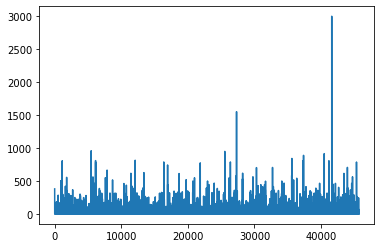

In [17]:
df_train['price'].plot();

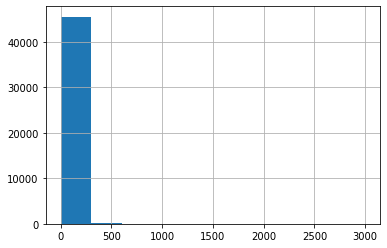

In [18]:
df_train['price'].hist();

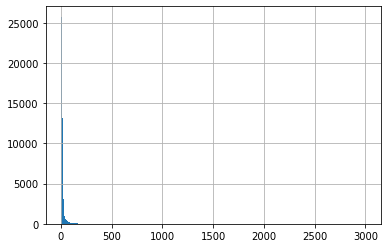

In [19]:
df_train['price'].hist(bins=300);

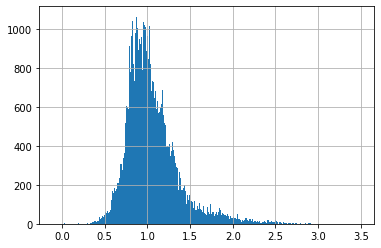

In [20]:
np.log10(df_train['price']).hist(bins=300);

most likelly going into log domain give much better results also checking how to choose mae metric 

In [27]:
AutoML.__dict__

mappingproxy({'__module__': 'supervised.automl',
              '__doc__': '\n    Automated Machine Learning for supervised tasks (binary classification, multiclass classification, regression).\n    ',
              '__init__': <function supervised.automl.AutoML.__init__(self, results_path=None, total_time_limit=3600, mode='Explain', ml_task='auto', model_time_limit=None, algorithms='auto', train_ensemble=True, stack_models='auto', eval_metric='auto', validation_strategy='auto', explain_level='auto', golden_features='auto', features_selection='auto', start_random_models='auto', hill_climbing_steps='auto', top_models_to_improve='auto', boost_on_errors='auto', kmeans_features='auto', mix_encoding='auto', max_single_prediction_time=None, optuna_time_budget=None, optuna_init_params={}, optuna_verbose=True, n_jobs=-1, verbose=1, random_state=1234)>,
              'fit': <function supervised.automl.AutoML.fit(self, X, y, sample_weight=None, cv=None)>,
              'predict': <function superv

In [25]:
df['price_log']= np.log10(df['price']) 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df[num_feats], df["price_log"], test_size=0.25
)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# automl = AutoML()
automl = AutoML(mode="Explain",eval_metric='mae' )
automl.fit(X_train, y_train)

predictions = automl.predict(X_test)

Linear algorithm was disabled.
AutoML directory: AutoML_3
The task is regression with evaluation metric mae
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline mae 0.22325 trained in 2.13 seconds
2_DecisionTree mae 0.185704 trained in 51.7 seconds
* Step default_algorithms will try to check up to 3 models


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


3_Default_Xgboost mae 0.109884 trained in 50.04 seconds
4_Default_NeuralNetwork mae 0.132166 trained in 16.44 seconds
5_Default_RandomForest mae 0.161253 trained in 34.13 seconds
* Step ensemble will try to check up to 1 model
Ensemble mae 0.109884 trained in 1.34 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 225.09 seconds
AutoML best model: 3_Default_Xgboost


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


###  New set of results this time with mae was generated in directory
http://localhost:8888/lab/tree/MLJAR/AutoML_3/README.md

##  5. There is need to get back from log domain 
typically you use 
*  y_pred = np.exp(y_log_pred)

here most likely there is need to modify predict method

In [ ]:
y_log_pred = model.predict(X)
y_pred = np.exp(y_log_pred)


# so the line should be modified
predictions = automl.predict(X_test)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# automl = AutoML()
automl = AutoML(mode="Explain",eval_metric='mae' )
automl.fit(X_train, y_train)

predictions = np.exp(automl.predict(X_test)) #this gets back to normal domain but

Linear algorithm was disabled.
AutoML directory: AutoML_4
The task is regression with evaluation metric mae
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline mae 0.22325 trained in 0.5 seconds
2_DecisionTree mae 0.185704 trained in 17.11 seconds
* Step default_algorithms will try to check up to 3 models


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


3_Default_Xgboost mae 0.109884 trained in 33.3 seconds
4_Default_NeuralNetwork mae 0.132166 trained in 4.32 seconds
5_Default_RandomForest mae 0.161253 trained in 23.94 seconds
* Step ensemble will try to check up to 1 model
Ensemble mae 0.109884 trained in 0.85 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 103.12 seconds
AutoML best model: 3_Default_Xgboost


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [32]:
# our particular setup is as below
automl.__dict__

{'_mode': 'Explain',
 '_ml_task': 'regression',
 '_results_path': 'AutoML_3',
 '_total_time_limit': 3600,
 '_model_time_limit': None,
 '_algorithms': ['Baseline',
  'Decision Tree',
  'Random Forest',
  'Xgboost',
  'Neural Network'],
 '_train_ensemble': True,
 '_stack_models': False,
 '_eval_metric': 'mae',
 '_validation_strategy': {'validation_type': 'split',
  'train_ratio': 0.75,
  'shuffle': True,
  'X_path': 'AutoML_3/X.data',
  'y_path': 'AutoML_3/y.data',
  'results_path': 'AutoML_3'},
 '_verbose': 1,
 '_explain_level': 2,
 '_golden_features': False,
 '_features_selection': False,
 '_start_random_models': 1,
 '_hill_climbing_steps': 0,
 '_top_models_to_improve': 0,
 '_random_state': 1234,
 '_models': [<supervised.model_framework.ModelFramework at 0x7f6e19291b70>,
 '_best_model': <supervised.model_framework.ModelFramework at 0x7f6e16e155f8>,
 '_threshold': None,
 '_metrics_details': None,
 '_max_metrics': None,
 '_confusion_matrix': None,
 '_X_path': 'AutoML_3/X.data',
 '_y_path